# Peter och vargen: Introduktion till förstärkningsinlärning

I denna handledning kommer vi att lära oss hur man tillämpar förstärkningsinlärning på ett problem med att hitta vägar. Miljön är inspirerad av den musikaliska sagan [Peter och vargen](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) av den ryske kompositören [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Det är en berättelse om den unge pionjären Peter, som modigt lämnar sitt hus och går till skogsgläntan för att jaga en varg. Vi kommer att träna maskininlärningsalgoritmer som hjälper Peter att utforska området och skapa en optimal navigeringskarta.

Först, låt oss importera en mängd användbara bibliotek:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Översikt av Förstärkningsinlärning

**Förstärkningsinlärning** (RL) är en inlärningsteknik som låter oss lära oss ett optimalt beteende för en **agent** i en viss **miljö** genom att utföra många experiment. En agent i denna miljö bör ha ett **mål**, definierat av en **belöningsfunktion**.

## Miljön

För enkelhetens skull, låt oss betrakta Peters värld som en kvadratisk spelplan med storleken `width` x `height`. Varje ruta på denna spelplan kan vara:
* **mark**, där Peter och andra varelser kan gå
* **vatten**, där man uppenbarligen inte kan gå
* **ett träd** eller **gräs** – en plats där man kan vila
* **ett äpple**, som representerar något Peter gärna skulle vilja hitta för att mätta sig
* **en varg**, som är farlig och bör undvikas

För att arbeta med miljön kommer vi att definiera en klass som heter `Board`. För att inte göra denna anteckningsbok för rörig har vi flyttat all kod för att arbeta med spelplanen till en separat modul som heter `rlboard`, vilken vi nu kommer att importera. Du kan titta in i denna modul för att få mer information om implementationens detaljer.


Låt oss nu skapa ett slumpmässigt bräde och se hur det ser ut:


In [4]:
# code block 1

## Åtgärder och Policy

I vårt exempel är Peters mål att hitta ett äpple, samtidigt som han undviker vargen och andra hinder. Definiera dessa åtgärder som en ordbok och koppla dem till par av motsvarande koordinatförändringar.


In [5]:
# code block 2

Strategin för vår agent (Peter) definieras av en så kallad **policy**. Låt oss titta på den enklaste policyn som kallas **slumpvandring**.

## Slumpvandring

Låt oss först lösa vårt problem genom att implementera en strategi för slumpvandring.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Belöningsfunktion

För att göra vår policy mer intelligent behöver vi förstå vilka drag som är "bättre" än andra.


In [8]:
#code block 5

## Q-Learning

Bygg en Q-Tabell, eller en flerdimensionell matris. Eftersom vår spelplan har dimensionerna `width` x `height`, kan vi representera Q-Tabellen med en numpy-array med formen `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Passera Q-tabellen till `plot`-funktionen för att visualisera tabellen på brädet:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Essensen av Q-Learning: Bellman-ekvationen och inlärningsalgoritmen

Skriv en pseudokod för vår inlärningsalgoritm:

* Initiera Q-Tabell Q med lika värden för alla tillstånd och handlingar
* Sätt inlärningshastighet $\alpha\leftarrow 1$
* Upprepa simuleringen många gånger
   1. Börja på en slumpmässig position
   1. Upprepa
        1. Välj en handling $a$ vid tillstånd $s$
        2. Utför handlingen genom att flytta till ett nytt tillstånd $s'$
        3. Om vi stöter på ett slutspelsvillkor, eller den totala belöningen är för liten - avsluta simuleringen  
        4. Beräkna belöningen $r$ vid det nya tillståndet
        5. Uppdatera Q-Funktionen enligt Bellman-ekvationen: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Uppdatera total belöning och minska $\alpha$.

## Exploatera vs. Utforska

Den bästa metoden är att balansera mellan utforskning och exploatering. När vi lär oss mer om vår miljö, kommer vi vara mer benägna att följa den optimala vägen, men ändå välja den outforskade vägen då och då.

## Python-implementation

Nu är vi redo att implementera inlärningsalgoritmen. Innan dess behöver vi också en funktion som kan konvertera godtyckliga värden i Q-Tabellen till en sannolikhetsvektor för motsvarande handlingar:


In [10]:
# code block 7

Vi lägger till en liten mängd `eps` till den ursprungliga vektorn för att undvika division med 0 i det initiala fallet, när alla komponenter i vektorn är identiska.

Den faktiska inlärningsalgoritmen kommer vi att köra i 5000 experiment, även kallade **epoker**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Efter att ha kört denna algoritm bör Q-tabellen uppdateras med värden som definierar attraktiviteten hos olika handlingar vid varje steg. Visualisera tabellen här:


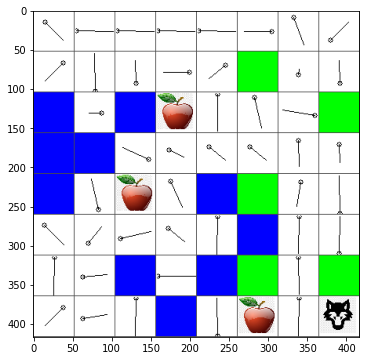

In [43]:
m.plot(Q)

## Kontrollera policyn

Eftersom Q-Tabellen listar "attraktiviteten" för varje handling i varje tillstånd, är det ganska enkelt att använda den för att definiera den effektiva navigeringen i vår värld. I det enklaste fallet kan vi helt enkelt välja den handling som motsvarar det högsta värdet i Q-Tabellen:


In [13]:
# code block 9

2

Om du testar koden ovan flera gånger, kanske du märker att den ibland bara "fastnar", och du måste trycka på STOP-knappen i notebooken för att avbryta den.

> **Uppgift 1:** Ändra `walk`-funktionen så att den begränsar den maximala längden på vägen till ett visst antal steg (säg, 100), och observera hur koden ovan returnerar detta värde då och då.

> **Uppgift 2:** Ändra `walk`-funktionen så att den inte återvänder till platser där den redan har varit tidigare. Detta kommer att förhindra att `walk` hamnar i en loop, men agenten kan fortfarande bli "fast" på en plats där den inte kan ta sig vidare.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


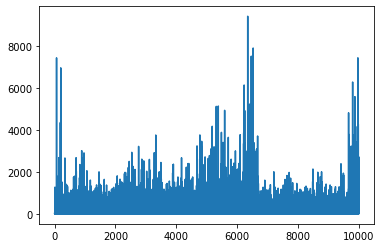

In [57]:
plt.plot(lpath)

## Övning
## En mer realistisk värld för Peter och vargen



---

**Ansvarsfriskrivning**:  
Detta dokument har översatts med hjälp av AI-översättningstjänsten [Co-op Translator](https://github.com/Azure/co-op-translator). Även om vi strävar efter noggrannhet, vänligen notera att automatiska översättningar kan innehålla fel eller felaktigheter. Det ursprungliga dokumentet på dess originalspråk bör betraktas som den auktoritativa källan. För kritisk information rekommenderas professionell mänsklig översättning. Vi ansvarar inte för eventuella missförstånd eller feltolkningar som uppstår vid användning av denna översättning.
